K-means聚类是一个聚类算法用来将
n 个点分成 k 个集群。


算法有3步：

1.初始化– K 个初始质心会被随机生成

2.分配 – K 集群通过点关联到最近的初始质心生成

3.更新 –重新计算k个集群对应的质心

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  

/Users/james/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Using matplotlib backend: MacOSX


In [2]:
#load data
df = pd.DataFrame({
    'x':[12,20,28,18,29,33,24,45,45,52,55,53,55,61],
    'y':[39,36,30,52,54,46,55,59,63,70,66,63,58,23]
})
np.random.seed(200)
colmap = {1:'r',2:'g',3:'b',4:'c',}


In [13]:
k = 2

centroids = {
        i+1:[np.random.randint(0,80),np.random.randint(0,80)]
        for i in range(k)
    }

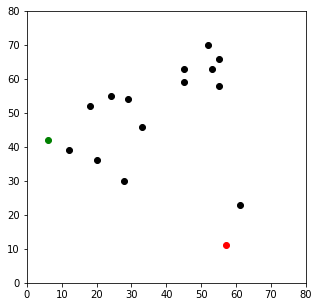

In [14]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color = 'k')
colmap = {1:'r',2:'g',3:'b',4:'c'}
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1],color = colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [15]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['{}'.format(i)]=(np.sqrt(
                (df['x']-centroids[i][0])**2 + 
                (df['y']-centroids[i][1])**2))
    
    
    
    centroids_distance_cols = ['{}'.format(i)for i in centroids.keys()]
    df['closest']= df.loc[:,centroids_distance_cols].idxmin(axis=1)
    df['closest']= df['closest'].map(lambda x:(x.lstrip('')))
    df['color']= df['closest'].map(lambda x:colmap[int(x)])
    
    return df


In [16]:
colmap[1]

'r'

In [17]:
df = assignment(df,centroids)
print(df.head())

    x   y          1          2          3          4 closest color
0  12  39  53.000000   6.708204  56.727418  71.512237       2     g
1  20  36  44.654227  15.231546  53.150729  62.968246       2     g
2  28  30  34.669872  25.059928  53.338541  53.450912       2     g
3  18  52  56.586217  15.620499  44.102154  71.867934       2     g
4  29  54  51.312766  25.942244  34.058773  64.031242       2     g


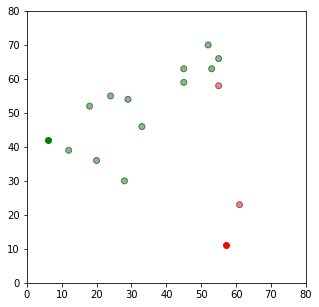

In [18]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color = df['color'],alpha=0.5,edgecolors='k')
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1],color= colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [19]:
import copy
old_centroids = copy.deepcopy(centroids)

In [20]:
#update stage


def update(k):
    for i in centroids.keys():
        k[i][0] = np.mean(df[df['closest']==str(i)]['x'])
        k[i][1] = np.mean(df[df['closest']==str(i)]['y'])
    return k



In [21]:
centroids = update(centroids)

In [22]:
centroids

{1: [58.0, 40.5], 2: [34.5, 52.75]}

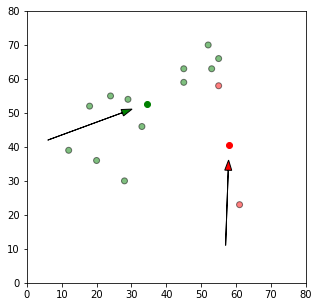

In [23]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color = df['color'],alpha=0.5,edgecolors='k')
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1],color= colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx =(centroids[i][0]- old_centroids[i][0])*0.75
    dy = (centroids[i][1]-old_centroids[i][1])*0.75
    plt.arrow(old_x,old_y,dx,dy,head_width =2, head_length =3, fc = colmap[i])
plt.show()

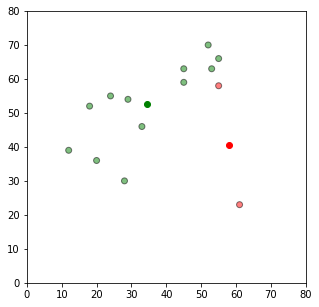

In [24]:
# repeat assignment stage

df = assignment(df,centroids)

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color = df['color'],alpha=0.5,edgecolors='k')
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1],color= colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

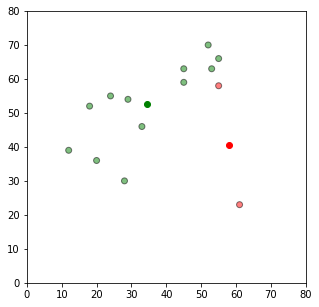

In [25]:
while True:
    closest_centriods = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df= assignment(df,centroids)
    if closest_centriods.equals(df['closest']):
        break
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color = df['color'],alpha=0.5,edgecolors='k')
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1],color= colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [26]:
centroids

{1: [58.0, 40.5], 2: [34.5, 52.75]}

In [27]:
df

,x,y,1,2,3,4,closest,color
0,12,39,46.024450,26.368779,56.727418,71.512237,2,g
1,20,36,38.265520,22.154289,53.150729,62.968246,2,g
2,28,30,31.784430,23.660357,53.338541,53.450912,2,g
3,18,52,41.620308,16.517037,44.102154,71.867934,2,g
4,29,54,31.988279,5.640257,34.058773,64.031242,2,g
5,33,46,25.597851,6.914658,37.202150,56.035703,2,g
6,24,55,36.962819,10.738366,37.443290,68.600292,2,g
7,45,59,22.610838,12.219349,19.723083,56.400355,2,g
8,45,63,25.985573,14.673531,16.401219,59.640590,2,g
9,52,70,30.103986,24.572597,6.708204,62.169124,2,g


In [28]:
for i in range(1,4):
    print((df[df['closest']==str(i)][str(i)]).sum())


35.510561809129406
209.01825333504706
0.0


In [29]:
def centroidsdistance(k,centroids):
    cost = 0
    if k == 1:
        print("cost")
        return cost
    if k == 2:
        cost = (np.sqrt((centroids[1][0]-centroids[2][0])**2 + (centroids[1][1]-centroids[2][1])**2))
    if k >= 3:
        
        for i in range(1,k):
            for j in range(i+1,k):
                cost = cost + (np.sqrt((centroids[i][0]-centroids[j][0])**2 + (centroids[i][1]-centroids[j][1])**2))
    return cost

In [30]:
centroidsdistance(2,centroids)

26.501179219046083